In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
pd.read_csv('/content/toy_dataset_modified.csv')

,City,Gender,Age,Income,Illness
0,New York City,Male,49.0,112226.0,No
1,New York City,Male,42.0,110534.0,No
2,New York City,Female,61.0,100665.0,No
3,New York City,Female,58.0,98147.0,Yes
4,New York City,Female,43.0,93100.0,No
...,...,...,...,...,...
1495,New York City,Male,33.0,123132.0,No
1496,New York City,Female,48.0,96889.0,No
1497,New York City,Male,27.0,93822.0,No
1498,New York City,Female,36.0,116129.0,No


In [7]:
df=pd.read_csv("/content/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [9]:
scaler=StandardScaler()
df[df.columns[1:]]=scaler.fit_transform(df[df.columns[1:]])

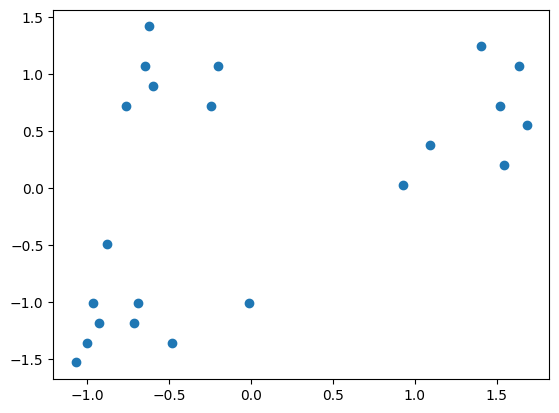

In [13]:
plt.scatter(df['Income($)'],df['Age'])
plt.show()

In [ ]:
inertias=[]

for k in range(1,15):
    model=KMeans(n_clusters=k)
    model.fit(df[df.columns[1:]])
    inertias.append(model.inertia_)
inertias

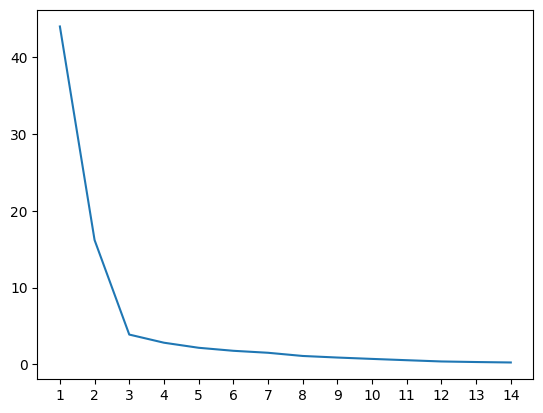

In [17]:
plt.plot(range(1,15),inertias)
plt.xticks(range(1,15))
plt.show()

In [21]:
model=KMeans(n_clusters=3)
gr=model.fit_predict(df[df.columns[1:]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
df['grouped']=gr

In [23]:
df

,Name,Age,Income($),grouped
0,Rob,-1.356055,-0.480684,0
1,Michael,-1.009157,-0.010159,0
2,Mohan,-1.009157,-0.692421,0
3,Ismail,-1.182606,-0.715947,0
4,Kory,1.245679,1.401417,2
5,Gautam,0.725332,1.519048,2
6,David,1.072230,1.636679,2
7,Andrea,0.551883,1.683732,2
8,Brad,0.204985,1.542574,2
9,Angelina,0.031536,0.930891,2


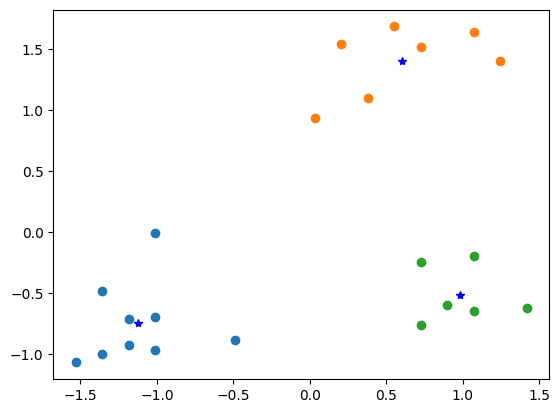

In [35]:
for n in df.grouped.unique():
    dfn=df[df.grouped==n]
    dfn=dfn[dfn.columns[1:]]
    plt.plot(dfn['Age'],dfn['Income($)'],'o')

plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],'*b')